In [154]:
# Bimi Bisht

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [155]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")
# Display the data table for preview

clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [156]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on= "Mouse ID", how ="outer")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [157]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

combined_data.groupby("Drug")["Timepoint"].count()
tumor_response = combined_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_response_df= tumor_response["Tumor Volume (mm3)"].mean().to_frame()
tumor_response_df.reset_index(level = None, inplace = True)
tumor_response_df.head

<bound method NDFrame.head of          Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421
20  Infubinol          0 

In [158]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_error = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# converting to DataFrame
tumor_err_df = tumor_response_error.to_frame()
tumor_err_df.reset_index(level = None, inplace = True)

#Displaying DataFrame
tumor_err_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [159]:

# Minor Data Munging to Re-Format the Data Frames
mean_tumor_df= pd.pivot_table(combined_data, index="Timepoint", columns="Drug",values = "Tumor Volume (mm3)",
                        aggfunc = np.mean)

# preview DataFrame
mean_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


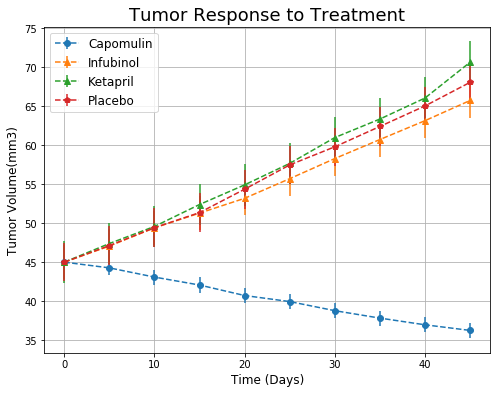

In [160]:
# Generationg the plot with error bars

Timepoint = mean_tumor_df.index
plt.figure(figsize=(8,6))
plt.errorbar(Timepoint, mean_tumor_df['Capomulin'],yerr=mean_tumor_df['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, mean_tumor_df['Infubinol'],yerr=mean_tumor_df['Infubinol'].sem(), marker ='^', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, mean_tumor_df['Ketapril'],yerr=mean_tumor_df['Ketapril'].sem(), marker ='^', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, mean_tumor_df['Placebo'],yerr=mean_tumor_df['Placebo'].sem(), marker ='p', linestyle='--', label="Placebo")

plt.ylabel('Tumor Volume(mm3)',fontsize=12)
plt.xlabel('Time (Days)',fontsize=12)
plt.title('Tumor Response to Treatment',fontsize=18)
plt.legend(loc="best", fontsize=12)


plt.savefig("../Tumor_response.png")
plt.grid()
plt.show()


## Metastatic Response to Treatment

In [161]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint combined_data.groupby("Drug")["Timepoint"].count()
combined_data.groupby("Drug")["Timepoint"].count()
met_response = combined_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
met_df = met_response["Metastatic Sites"].mean().to_frame()
met_df.reset_index(level = None, inplace = True)

# Preview DataFrame
met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [162]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_response_error = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meterr_df = met_response_error.to_frame()
meterr_df.reset_index(level = None, inplace = True)
# Preview DataFrame
meterr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [163]:
Metastatic_sites = pd.pivot_table(met_df, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
Metastatic_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


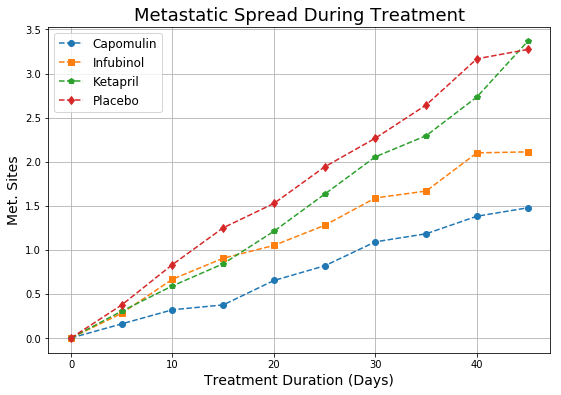

In [164]:
#Generating Plot

Metastatic = Metastatic_sites.index
plt.figure(figsize=(9,6))

plt.plot(Metastatic, Metastatic_sites['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Metastatic, Metastatic_sites['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Metastatic, Metastatic_sites['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Metastatic, Metastatic_sites['Placebo'], marker ='d', linestyle='--', label="Placebo")

plt.title('Metastatic Spread During Treatment', fontsize=18)
plt.xlabel('Treatment Duration (Days)', fontsize=14)
plt.ylabel('Met. Sites', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid()


# Save the Figure
plt.savefig("metastaticRate.png")
# Show the Figure
plt.show()


## Survival Rates

In [165]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=combined_data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mice_count_df=pd.DataFrame(mice_count["Mouse ID"])
mice_count_df.reset_index(inplace=True)

#Display dataframe
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [166]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
Survival_pivot = pd.pivot_table(mice_count, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)
Survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


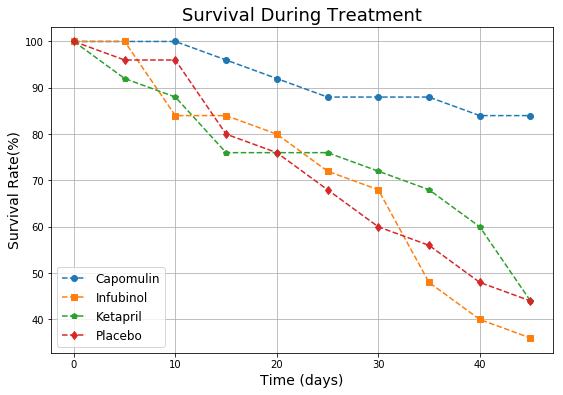

In [167]:
# Generate the Plot (Accounting for percentages)
Survival_percentage = Survival_pivot.copy()
Survival_percentage = round(Survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)


Survival_rate =  Survival_percentage.index

plt.figure(figsize=(9,6))
plt.plot(Survival_rate, Survival_percentage['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Survival_rate, Survival_percentage['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percentage['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Survival_rate, Survival_percentage['Placebo'], marker ='d', linestyle='--', label="Placebo")

plt.title('Survival During Treatment', fontsize=18)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Rate(%)', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid()


# Save the Figure
plt.savefig("../SurvivalRate.png")

plt.show()

## Summary Bar Graph

In [168]:
# Calculate the percent changes for each drug
cap_percent_change = ((mean_tumor_df["Capomulin"][45] - mean_tumor_df["Capomulin"][0])/45)*100
infu_percent_change = ((mean_tumor_df["Infubinol"][45] - mean_tumor_df["Infubinol"][0])/45)*100
keta_percent_change = ((mean_tumor_df["Ketapril"][45] - mean_tumor_df["Ketapril"][0])/45)*100
plac_percent_change = ((mean_tumor_df["Placebo"][45] - mean_tumor_df["Placebo"][0])/45)*100
ceft_percent_change = ((mean_tumor_df["Ceftamin"][45] - mean_tumor_df["Ceftamin"][0])/45)*100
naft_percent_change = ((mean_tumor_df["Naftisol"][45] - mean_tumor_df["Naftisol"][0])/45)*100
prop_percent_change = ((mean_tumor_df["Propriva"][45] - mean_tumor_df["Propriva"][0])/45)*100
rami_percent_change = ((mean_tumor_df["Ramicane"][45] - mean_tumor_df["Ramicane"][0])/45)*100
stel_percent_change = ((mean_tumor_df["Stelasyn"][45] - mean_tumor_df["Stelasyn"][0])/45)*100
zoni_percent_change = ((mean_tumor_df["Zoniferol"][45] - mean_tumor_df["Zoniferol"][0])/45)*100         


 # Display the data to confirm
percent_tuple = {'Capomulin': cap_percent_change, 'Infubinol': infu_percent_change, 'Ketapril': keta_percent_change, 'Placebo': plac_percent_change,'Naftisol': naft_percent_change,
                'Ramicane':rami_percent_change,'Ceftamin': ceft_percent_change,'Zoniferol':zoni_percent_change,'Stelasyn':stel_percent_change,'Propriva':prop_percent_change}

percentchange_tuple = pd.Series(percent_tuple)

percentchange_tuple

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Naftisol     53.923347
Ramicane    -22.320900
Ceftamin     42.516492
Zoniferol    46.579751
Stelasyn     52.085134
Propriva     47.241175
dtype: float64

In [169]:
# Store all Relevant Percent Changes into a Tuple
# Using four drugs for the bar graph
percent_four_df=pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [cap_percent_change, infu_percent_change, keta_percent_change, plac_percent_change]
                             })
#percentchange_tuple
                            
percent_four_df                      

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


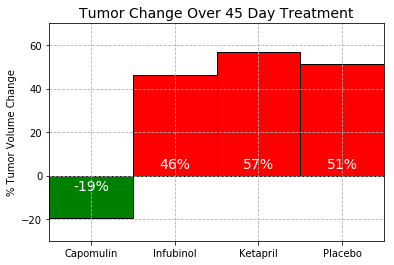

<Figure size 432x288 with 0 Axes>

In [173]:
rects1 = plt.bar(0, percent_four_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, percent_four_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, percent_four_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, percent_four_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, percent_four_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=14)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

plt.savefig("Summary_bar.png")

In [171]:
#3 Observations: 
# The final observations is on 3 drugs and a Placebo.
# According to the last figure, Capomulin is reducing the tumor size by -19.475303.
# Survival rates of mice under Capomulin is also higher compared to the other drugs.
# Mice treated with Capomulin also show less metastasis than the placebo and other drugs. 
# Capomulin had the highest impact on tumor volume reduction, the highest 45 day mouse survival rates,
# and the lowest formation of metastatic sites. Ketapril had a negative impact, producing worse result than the placebo,
# resulting in the highest tumor growth and highest metastatic spread. Inubinol reduced the survival of the mice more than any other treatment.
# In conclusion, Capomulin has the greatest potential for treating squamous cell carcinoma.